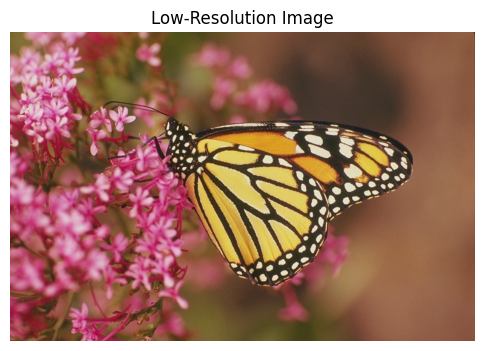

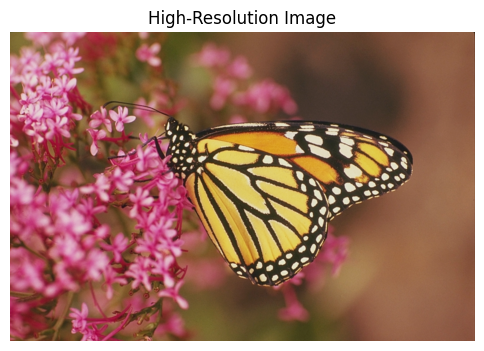

finish


In [7]:
%run GlobalConfig.ipynb
%run CNNModel.ipynb
%run ImageSR.ipynb
import cv2
import torch
import torch.nn as nn
import math
import numpy as np
from torchvision.transforms import ToTensor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def bicubic_interpolation(img, scale_factor):
    width, height = img.size
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)

    img_np = np.array(img)
    img_np = cv2.resize(img_np, (new_width, new_height), interpolation=cv2.INTER_LANCZOS4)
    img = Image.fromarray(img_np)
    return img
    
# 加载模型并移到 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvLutModel().to(device)
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model.eval()  # 设置为评估模式

# 文件路径
lr_image_path = 'G:/Data/Test/'

lr_image_name = '1.png'
# 读取 LR 图像
lr_image = Image.open(lr_image_path + lr_image_name).convert('RGB')

# 可视化 LR 图像
plt.figure(figsize=(6, 6))
plt.imshow(lr_image)
plt.title('Low-Resolution Image')
plt.axis('off')
plt.show()

# 转换为 PyTorch 张量并移到 GPU
to_tensor = ToTensor()
lr_tensor = to_tensor(lr_image).unsqueeze(0).to(device)

# 应用 LUT
hr_image = apply_lut(lr_tensor.squeeze().permute(1, 2, 0).to(device), model, scale_factor=global_scale_factor, device=device).cpu().detach().numpy()

# 可视化 HR 图像
plt.figure(figsize=(6, 6))
plt.imshow(hr_image)
plt.title('High-Resolution Image')
plt.axis('off')
plt.show()

# 将 float32 类型转换为 uint8 类型，范围在 0 到 255
uint8_image = (hr_image * 255).astype(np.uint8)

# 将 hr_image 转换为 PIL 图像
hr_image_pil = Image.fromarray(uint8_image)

# 保存 HR 图像到文件
hr_image_pil.save(lr_image_path+'SR_'+ lr_image_name)

# 双三次插值超采样
img_bicubic = bicubic_interpolation(Image.open(lr_image_path + lr_image_name), scale_factor=global_scale_factor)
img_bicubic.show()

# 保存超采样后的图像
img_bicubic.save(lr_image_path+'SR_LANCZOS4_'+ lr_image_name)

lr_image.close()
print('finish')
